# Simple test

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pytree import *
from test import *
import random
import matplotlib.pyplot as plt

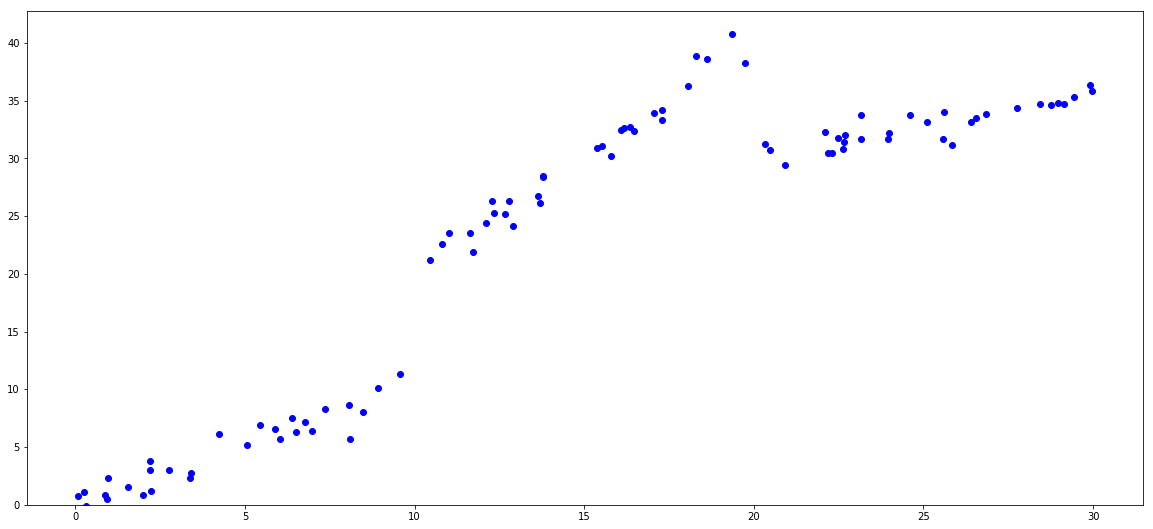

In [3]:
random.seed(42)
dataset =  generate_dataset(0, 1, 30, 0, 10) +\
           generate_dataset(0, 2, 30, 10, 20) +\
           generate_dataset(20, 0.5, 30, 20, 30)

def add_normal_noise(dataset, sigma):
    return [(d[0], d[1] + random.gauss(0, sigma)) for d in dataset]

dataset = add_normal_noise(dataset, 1)

def plot_dataset(data, hline=None, reg=None):
    x = [d[0] for d in data]
    y = [d[1] for d in data]
    plt.figure(figsize=(20,20))
    plt.subplot(2,1,1)
    plt.plot(x, y, 'o', color='blue')
    if hline:
        plt.axhline(y=hline, color='red', linestyle='-')
    if reg:
        new_y = [reg.predict(d[0]) for d in sorted(dataset)]
        new_x = [d[0] for d in sorted(dataset)]
        plt.plot(new_x, new_y, '-', color='red')
    axes = plt.gca()
    axes.set_ylim(0)
    plt.show()
plot_dataset(dataset)

In [4]:
reg = compute_regression(dataset)
print(reg)
print(reg.breakpoints)

x ≤ 19.731?
    └──x ≤ 9.572?
    │    └──y ~ 1.027x + 0.106
    │    └──y ~ 2.001x + 0.144
    └──y ~ 0.534x + 19.448
[9.572130722067811, 19.731157639793707]


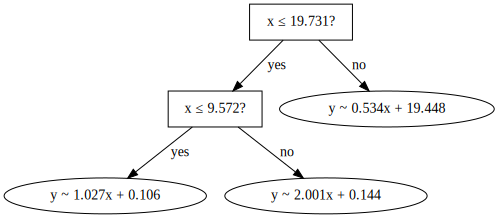

In [5]:
reg.to_graphviz()

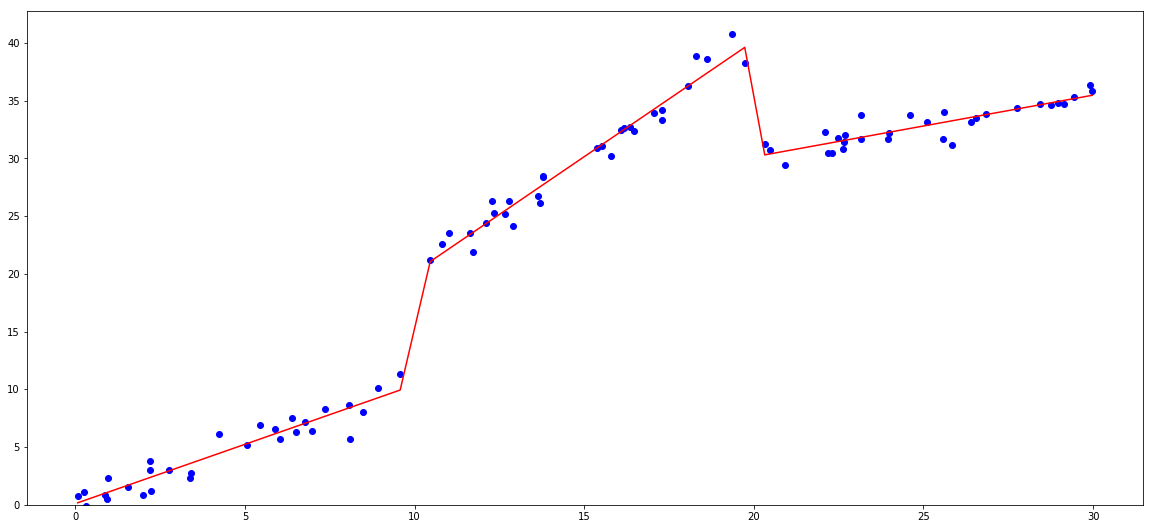

In [6]:
plot_dataset(dataset, reg=reg)

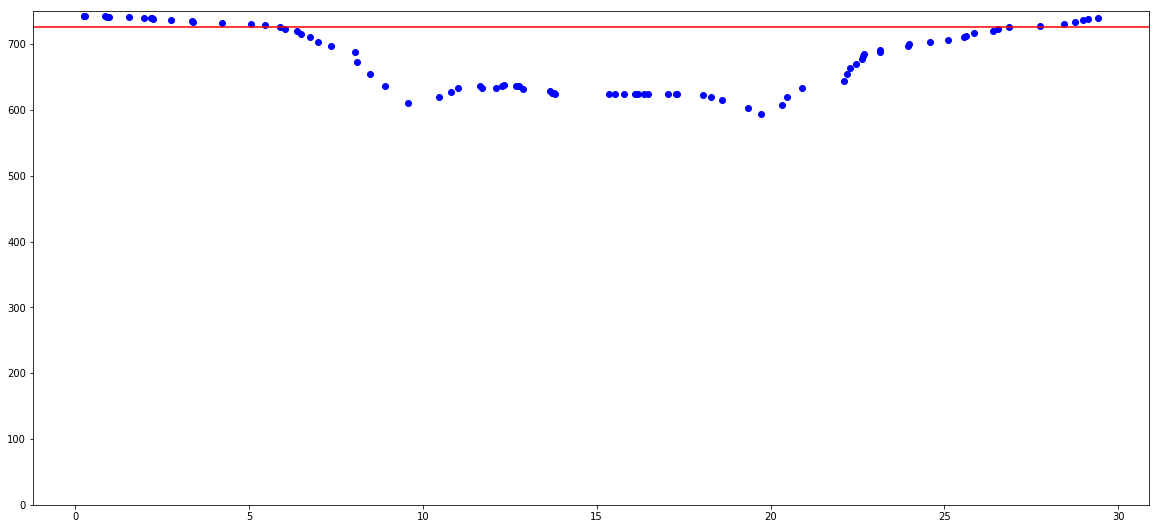

In [7]:
plot_dataset(reg.errors.split, reg.errors.nosplit)

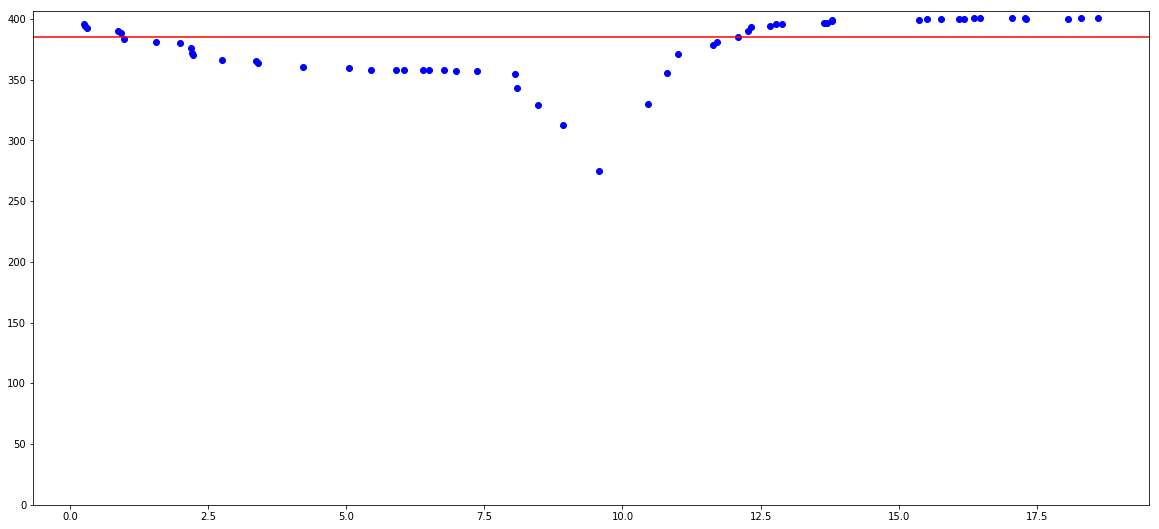

In [8]:
plot_dataset(reg.left.errors.split, reg.left.errors.nosplit)

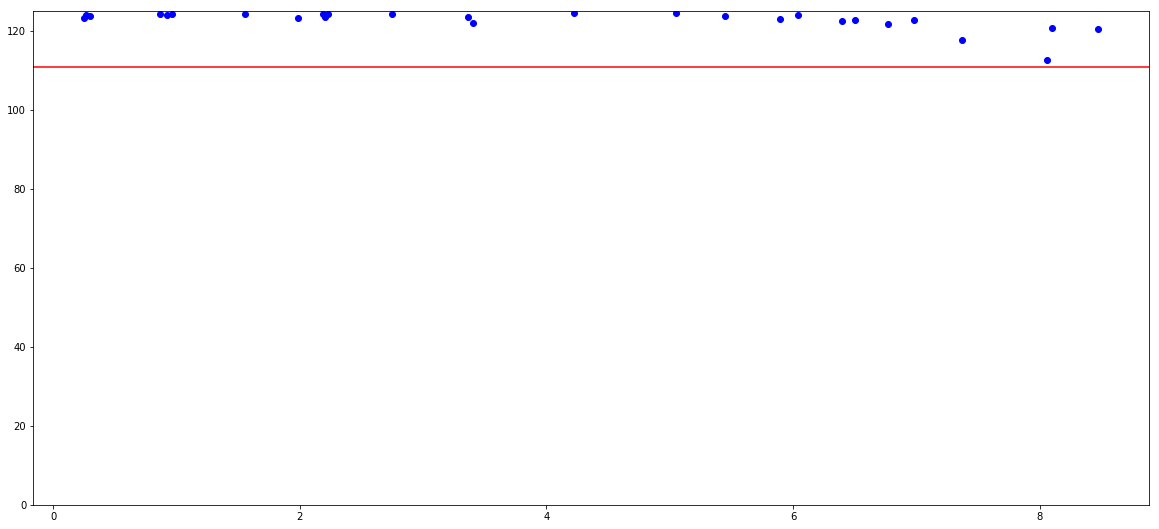

In [9]:
plot_dataset(reg.left.left.errors.split, reg.left.left.errors.nosplit)

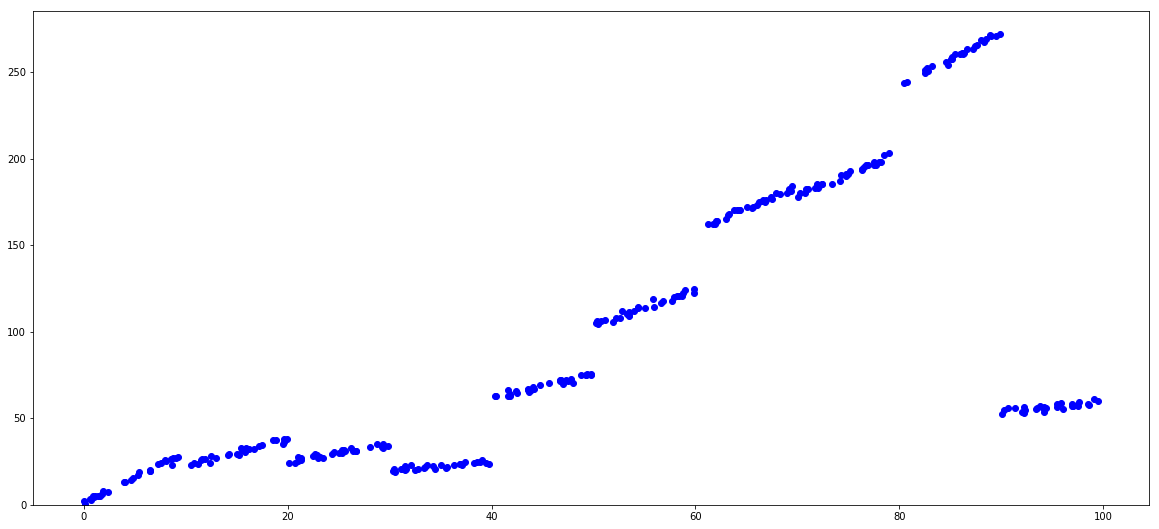

In [10]:
dataset = []
for split in range(0, 100, 10):
    intercept = random.randint(1, 10)
    coeff = random.choice([0.5, 1, 1.5, 2, 2.5, 3])
    dataset += generate_dataset(intercept, coeff, 30, split, split+10)

dataset = add_normal_noise(dataset, 1)
random.shuffle(dataset)
plot_dataset(dataset)

In [11]:
reg = compute_regression(dataset)
print(reg)
print(reg.breakpoints)

x ≤ 89.879?
    └──x ≤ 39.798?
    │    └──x ≤ 19.954?
    │    │    └──x ≤ 9.265?
    │    │    │    └──y ~ 2.876x + 1.447
    │    │    │    └──y ~ 1.493x + 7.968
    │    │    └──x ≤ 29.839?
    │    │         └──y ~ 0.980x + 5.542
    │    │         └──y ~ 0.501x + 4.949
    │    └──x ≤ 71.066?
    │         └──x ≤ 59.842?
    │         │    └──x ≤ 49.738?
    │         │    │    └──y ~ 1.409x + 5.316
    │         │    │    └──y ~ 2.009x + 3.548
    │         │    └──x ≤ 69.489?
    │         │         └──y ~ 2.527x + 7.083
    │         │         └──y ~ 3.835x + -90.143
    │         └──x ≤ 79.012?
    │              └──y ~ 2.508x + 3.176
    │              └──y ~ 3.059x + -2.272
    └──y ~ 0.601x + -0.509
[9.265180735593333, 19.95422689492714, 29.838533102514823, 39.79797953828836, 49.73837022637289, 59.842358493165904, 69.48874485971314, 71.06587296563539, 79.01180825828254, 89.87892453066448]


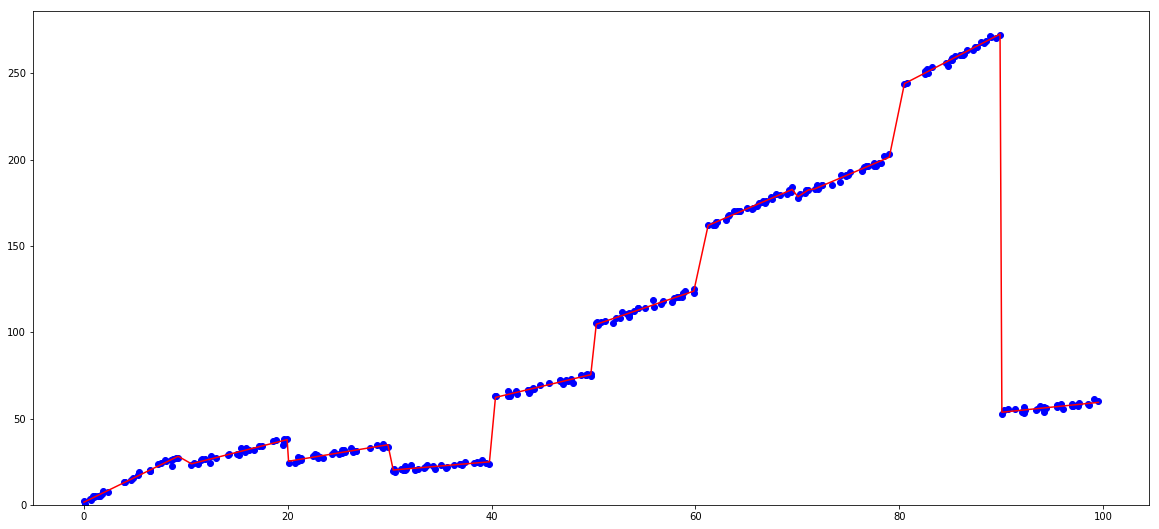

In [12]:
plot_dataset(dataset, reg=reg)

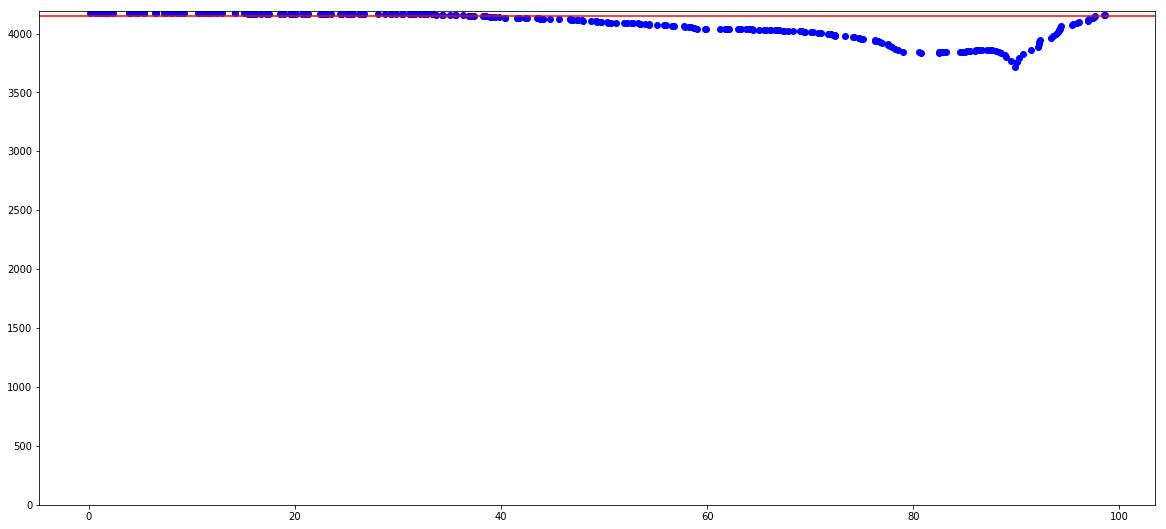

In [13]:
plot_dataset(reg.errors.split, reg.errors.nosplit)

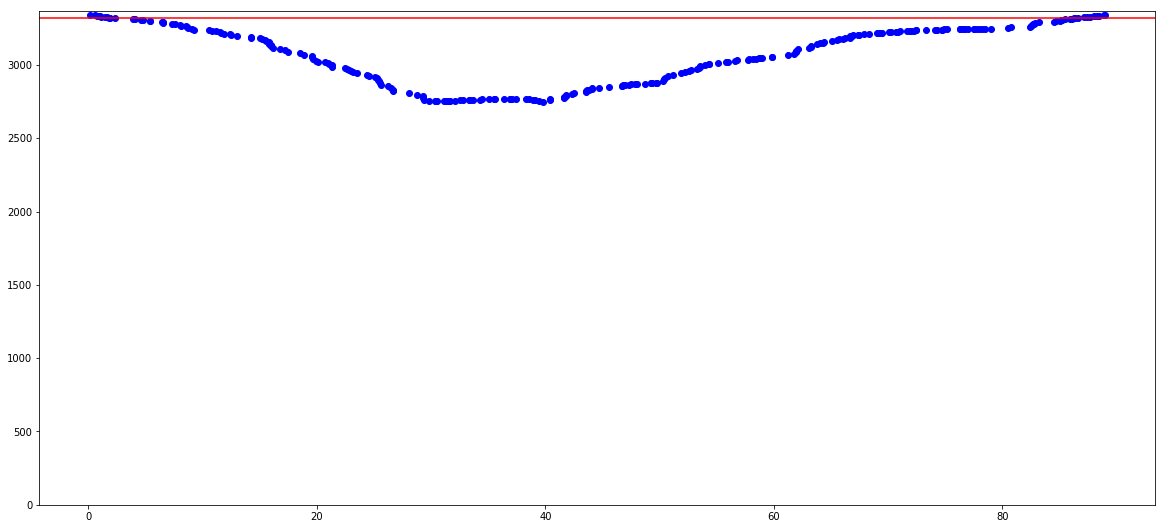

In [14]:
plot_dataset(reg.left.errors.split, reg.left.errors.nosplit)

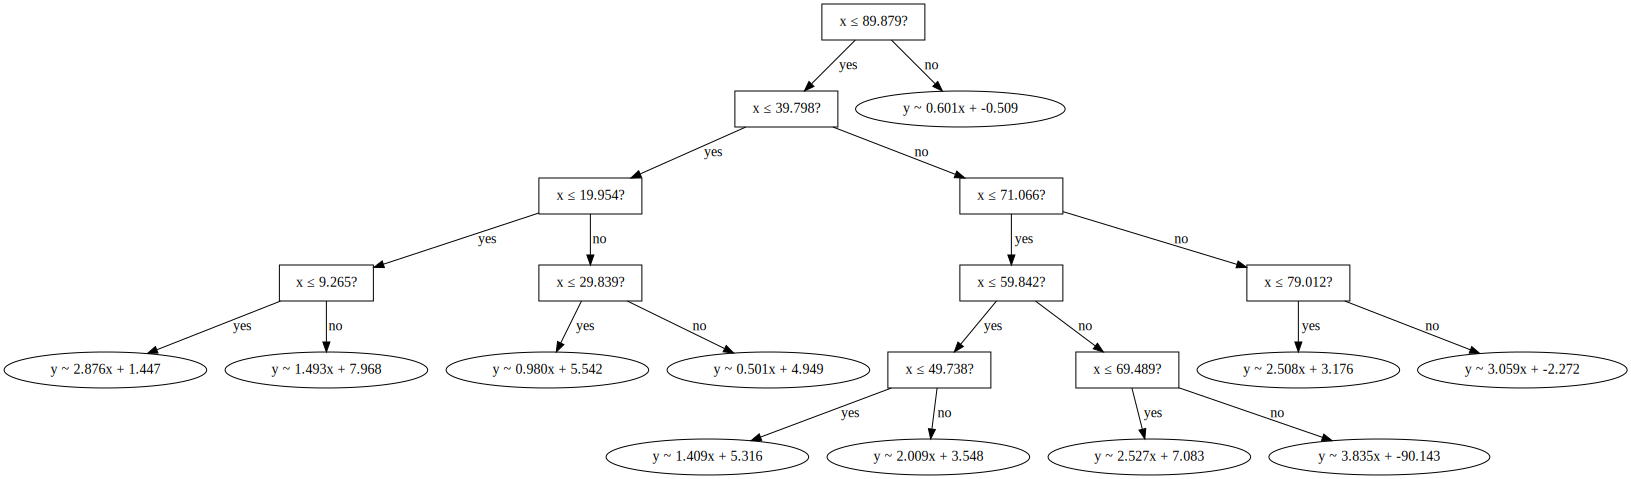

In [15]:
reg.to_graphviz()